In [121]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df_bordeaux=pd.read_csv("../bordeaux.csv")

In [8]:
df_bordeaux


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,579652405189065070,https://www.airbnb.com/rooms/579652405189065070,20220912200234,2022-09-12,city scrape,Appartement cosy dans centre historique de Bourg,"Dans le centre historique de Bourg, idéalement...",Vous vous situez dans le centre historique de ...,https://a0.muscache.com/pictures/miso/Hosting-...,15134863,...,5.00,5.00,4.93,NaN,t,1,1,0,0,2.74
1,49797548,https://www.airbnb.com/rooms/49797548,20220912200234,2022-09-12,city scrape,Maison de vacances entre Bordeaux et le Bassin,Villa moderne idéalement située entre Bordeaux...,Ballades à pied ou à vélo dans la foret: 5 vél...,https://a0.muscache.com/pictures/miso/Hosting-...,83677621,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.21
2,218103,https://www.airbnb.com/rooms/218103,20220912200234,2022-09-13,city scrape,B&B Apart.Suite / tropical garden,"<b>The space</b><br />The Bambooyard : ""Le cl...",NaN,https://a0.muscache.com/pictures/9ba23c8f-4780...,1127981,...,4.96,4.57,4.54,NaN,f,4,4,0,0,0.44
3,1117474,https://www.airbnb.com/rooms/1117474,20220912200234,2022-09-13,city scrape,INCROYABLE T3 EN HYPERCENTRE,<b>The space</b><br />In the heart of the hist...,NaN,https://a0.muscache.com/pictures/20359851/80f7...,6133211,...,4.88,4.93,4.80,330630009852A,f,1,1,0,0,3.31
4,1136724,https://www.airbnb.com/rooms/1136724,20220912200234,2022-09-12,city scrape,"Spacious house, 4 guests with Garden & Garage","BOOK A STREET ART HOUSE! Cozy, colorful and cl...",NaN,https://a0.muscache.com/pictures/b876925a-2b69...,3774373,...,4.91,4.62,4.70,33063003349C9,t,4,4,0,0,4.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,591221838086690180,https://www.airbnb.com/rooms/591221838086690180,20220912200234,2022-09-13,previous scrape,Maison chaleureuse avec piscine près de Bordeaux,Bienvenue dans notre maison ! <br />C'est notr...,Nous sommes situés à 20 min de la gare de bord...,https://a0.muscache.com/pictures/miso/Hosting-...,5220890,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
10881,50594474,https://www.airbnb.com/rooms/50594474,20220912200234,2022-09-13,city scrape,Le clos des vignes****,À 20 minutes de Bordeaux et à 3 minutes des so...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,408562043,...,4.95,4.74,4.83,NaN,f,2,2,0,0,5.73
10882,556379338554707629,https://www.airbnb.com/rooms/556379338554707629,20220912200234,2022-09-13,city scrape,escale gourmande au coeur des vignobles,studio independant comportant:<br /><br /> une...,quartier calme ambiance vigne et campagne à 2 ...,https://a0.muscache.com/pictures/6349e9f7-cdce...,62440676,...,4.77,4.73,4.64,NaN,t,3,2,1,0,6.11
10883,16789721,https://www.airbnb.com/rooms/16789721,20220912200234,2022-09-13,previous scrape,Logement aux portes de Bordeaux et de l'océan,"Situé au départ de la route des châteaux, à 10...",Quartier calme,https://a0.muscache.com/pictures/miso/Hosting-...,111565429,...,5.00,4.88,4.88,NaN,t,1,1,0,0,0.26


In [9]:
df_bordeaux.columns


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [33]:
df_bordeaux_neighbourhood=df_bordeaux[["host_id","number_of_reviews","neighbourhood_cleansed"]].groupby("neighbourhood_cleansed").agg({"host_id":"count","number_of_reviews":"sum"})
df_bordeaux_neighbourhood.rename(columns={'host_id':'nombre_of_host'},inplace=True)


,nombre_of_host,number_of_reviews
neighbourhood_cleansed,,
3M-Bourgailh,0.006146,0.001711
Ambars-et-Lagrave,0.042409,0.015783
Ambs,0.035034,0.029925
Arago-La Chataigneraie,0.035648,0.027638
Arlac,0.060234,0.051906
...,...,...
Sardine,0.012907,0.013758
Talence,0.303626,0.236936
Toctoucau,0.011063,0.008363


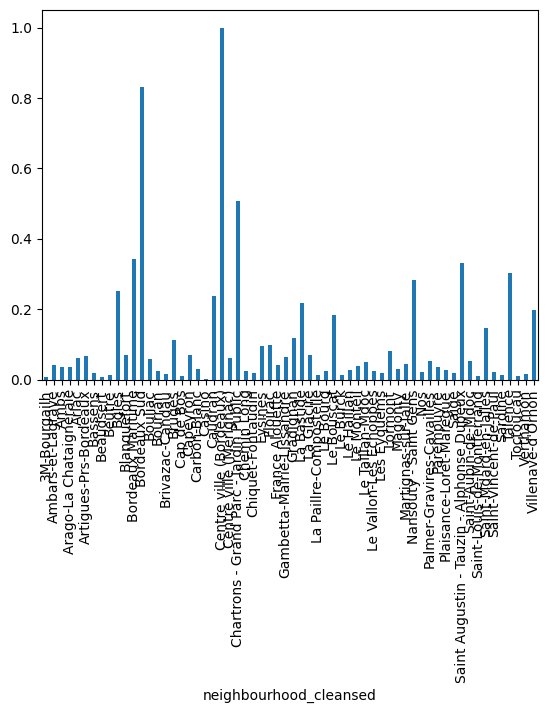

In [23]:
for i in df_bordeaux_neighbourhood.columns :
    df_bordeaux_neighbourhood[i]=df_bordeaux_neighbourhood[i]/df_bordeaux_neighbourhood[i].max()

df_bordeaux_neighbourhood   

<AxesSubplot: xlabel='neighbourhood_cleansed'>

<Figure size 640x480 with 0 Axes>

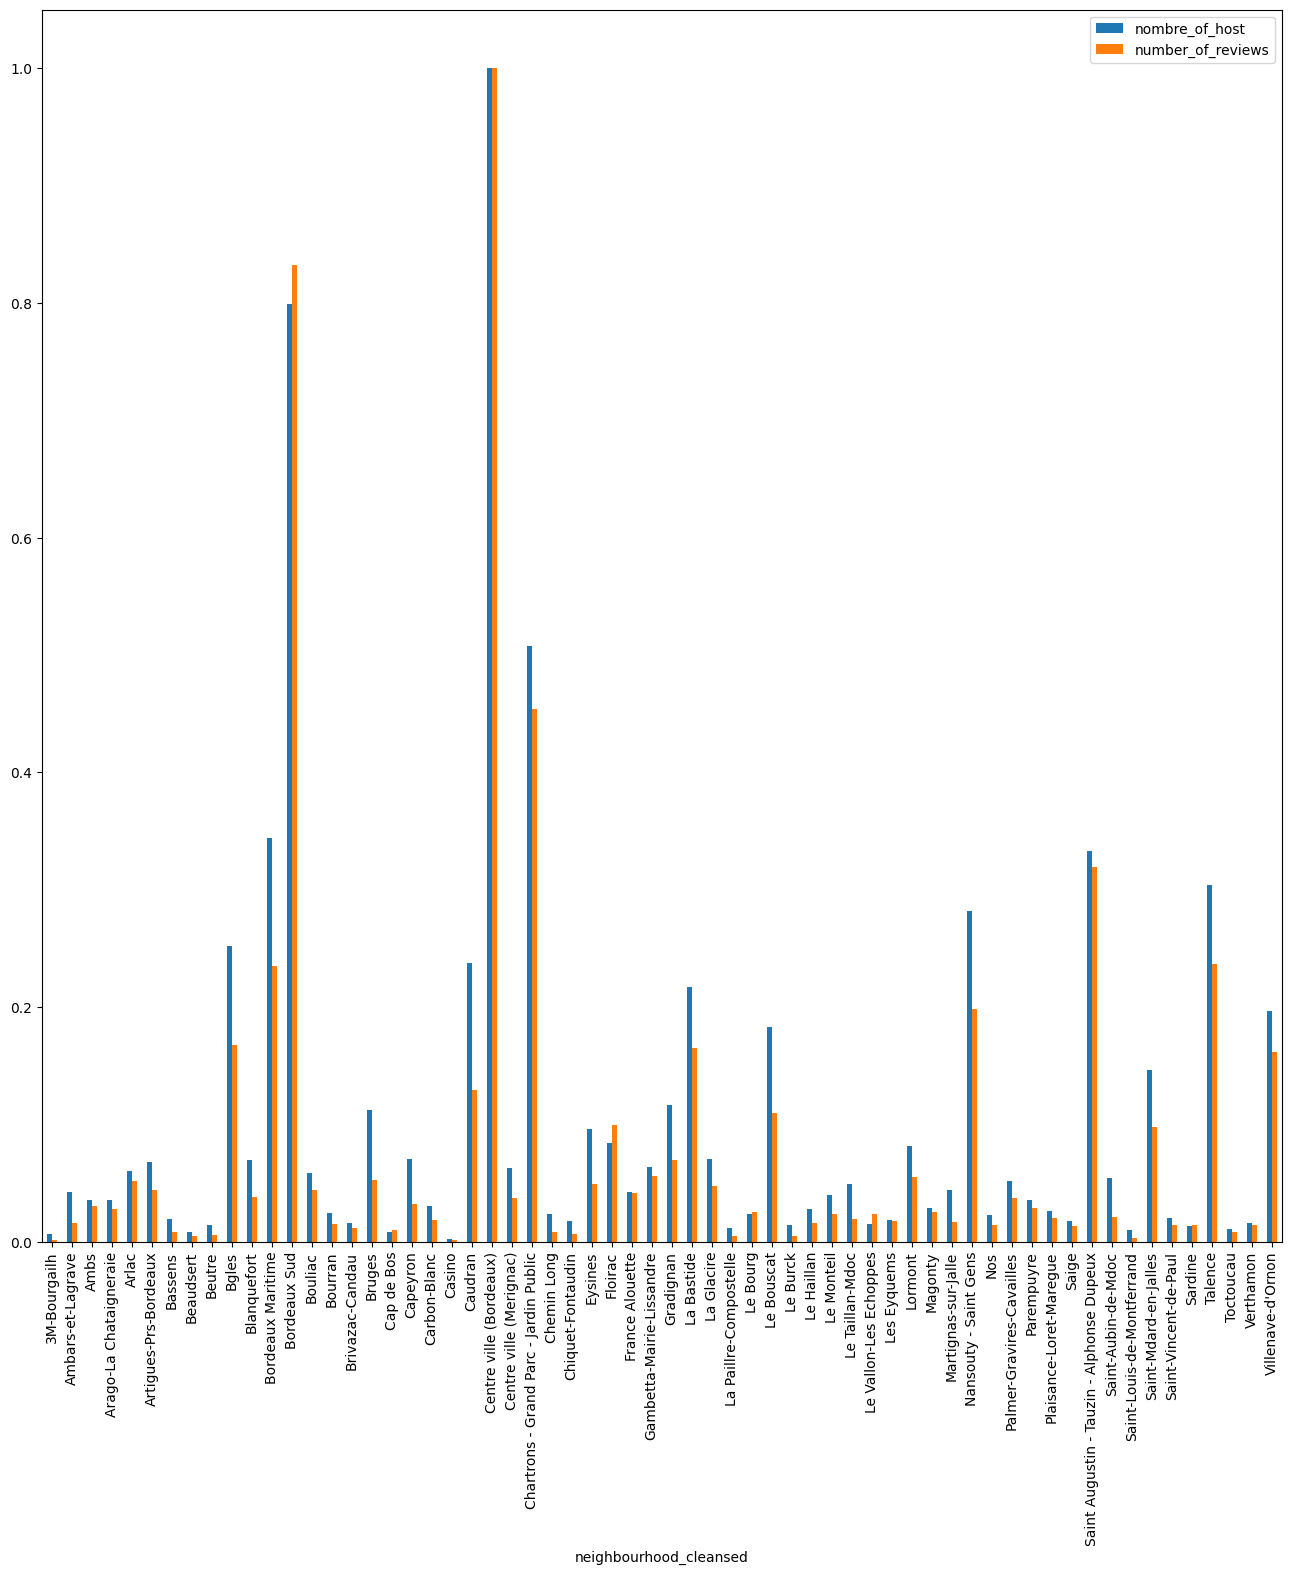

In [24]:
# 1 

df_bordeaux_neighbourhood.sort_by().plot.bar(figsize=(16,16))

Text(0.5, 1.0, 'Le nombre de reviews par quartier')

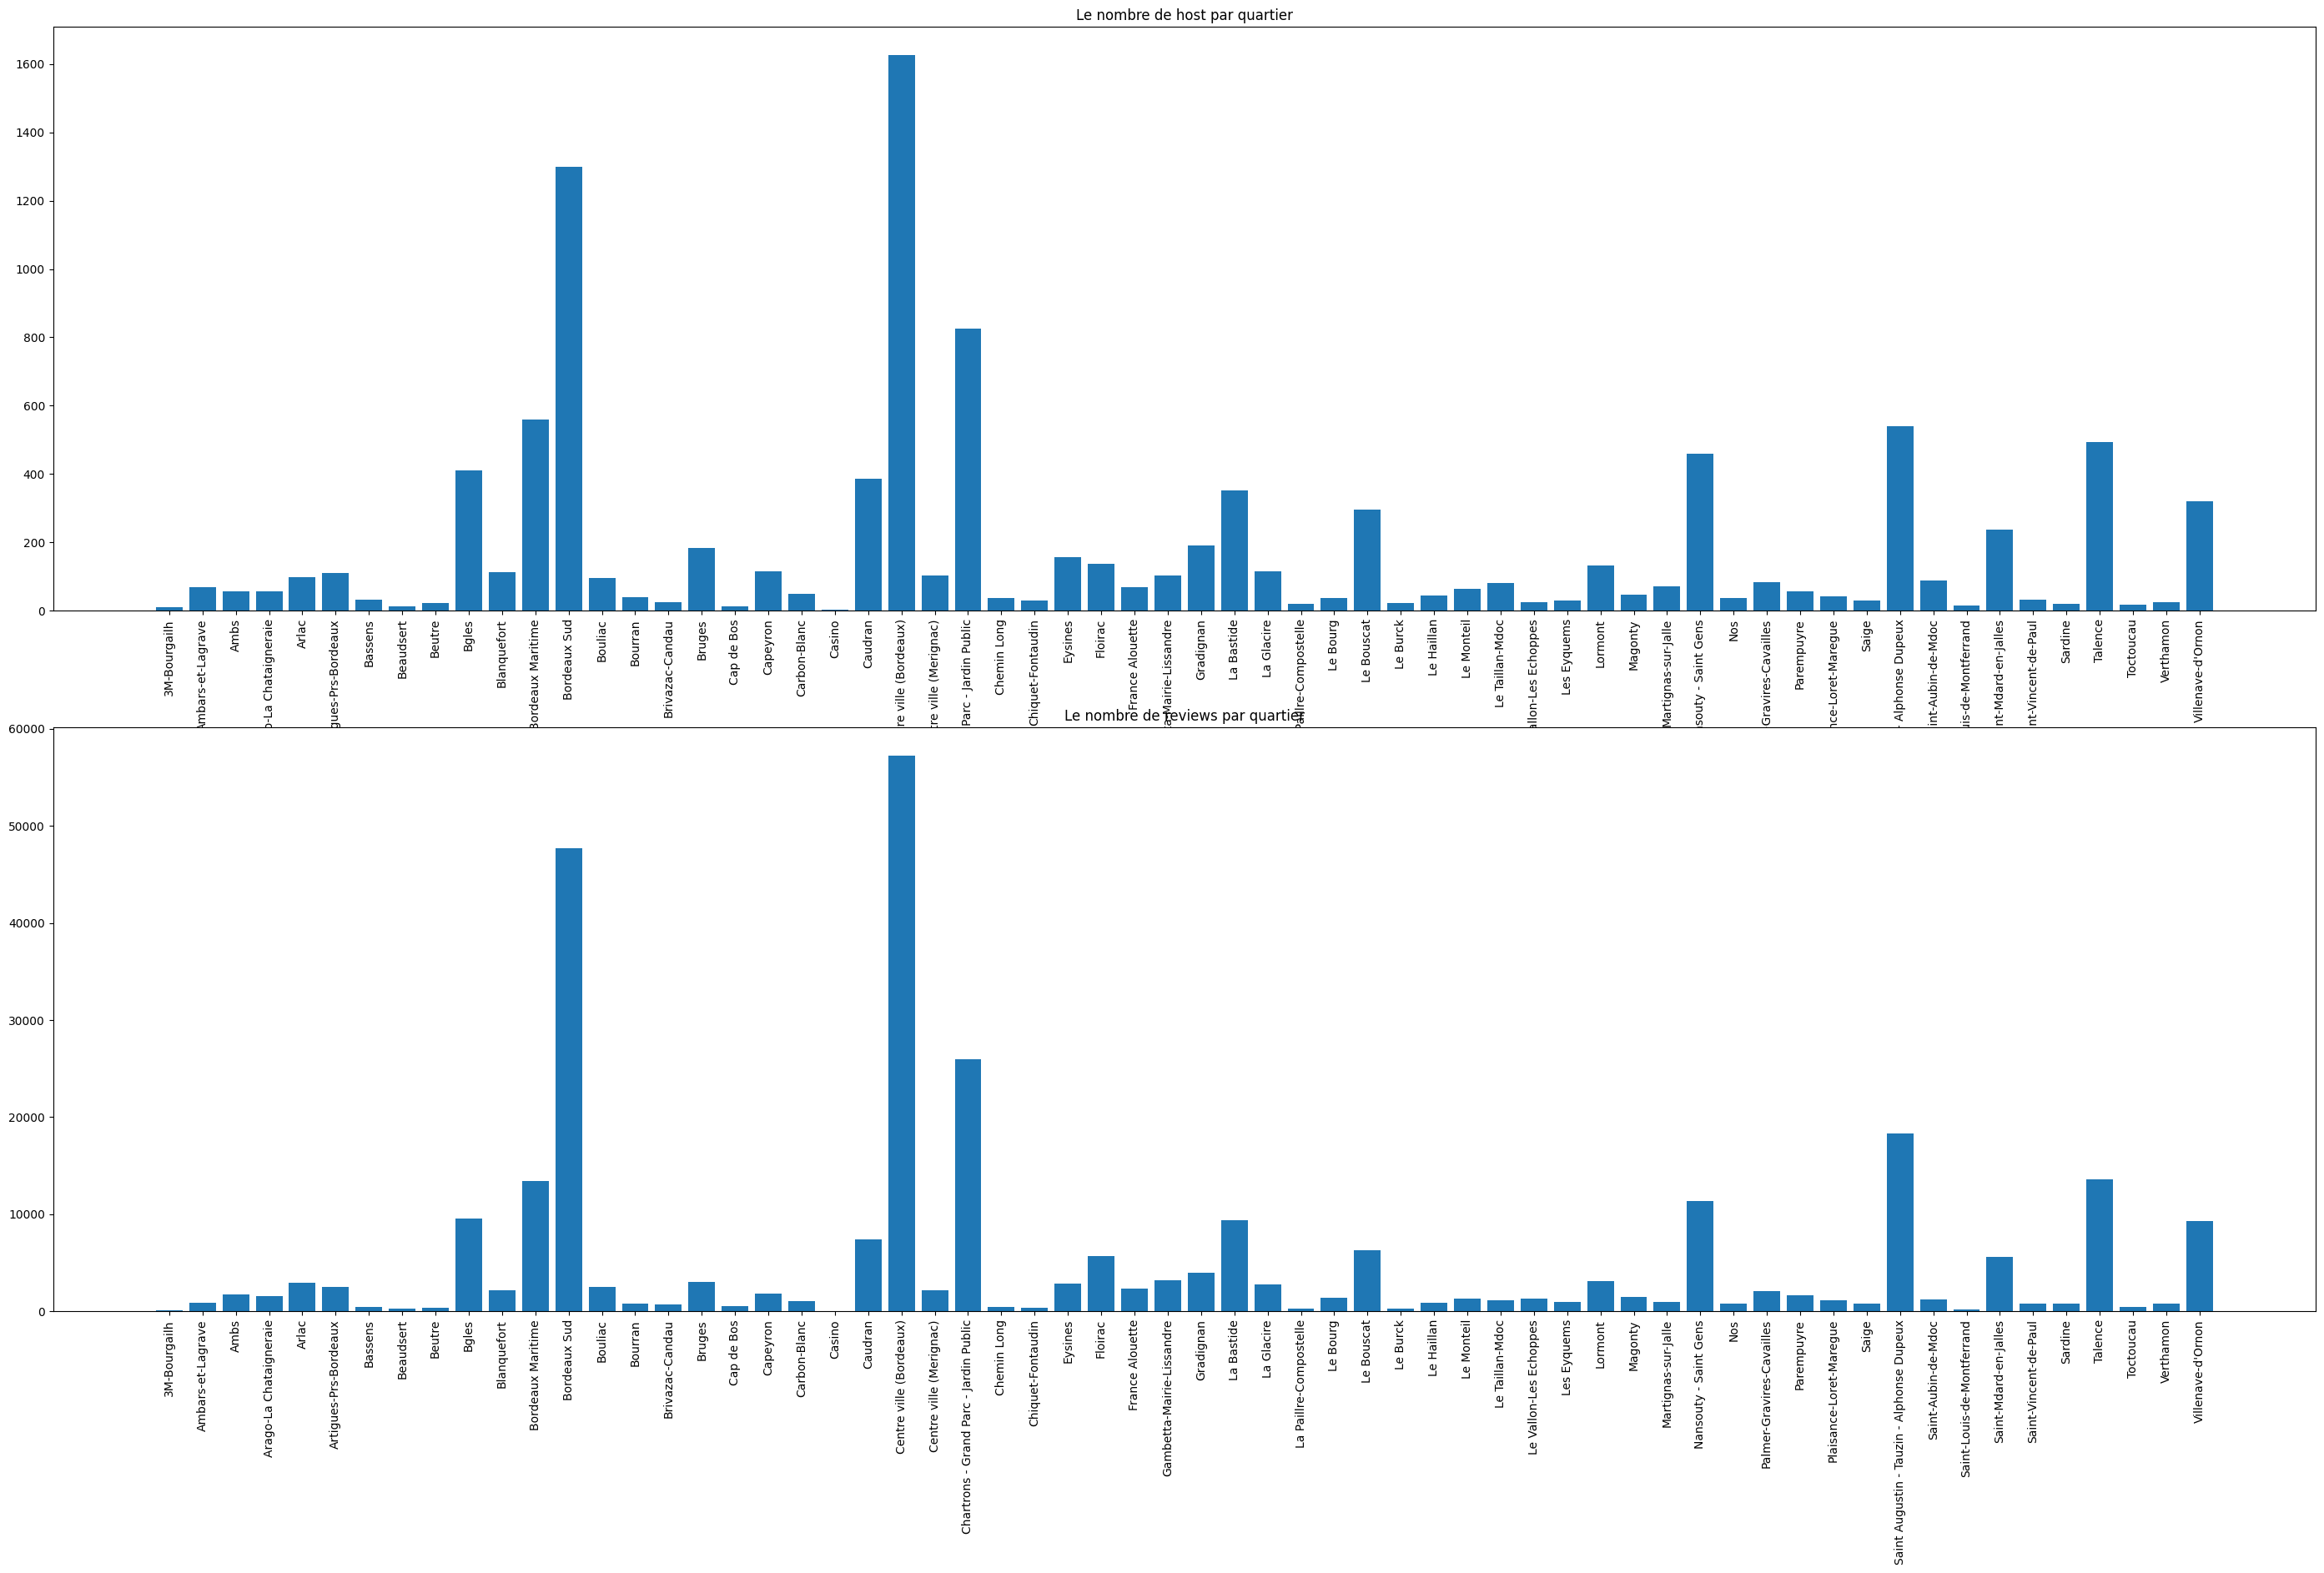

In [38]:
plt.figure(figsize=(20,20))
plt.subplot(211)
plt.bar(x=df_bordeaux_neighbourhood.index,height=df_bordeaux_neighbourhood['nombre_of_host'])
plt.xticks(rotation=90)
plt.title("Le nombre de host par quartier")
plt.subplot(212)
plt.bar(x=df_bordeaux_neighbourhood.index,height=df_bordeaux_neighbourhood['number_of_reviews'])
plt.xticks(rotation=90)
plt.title("Le nombre de reviews par quartier")


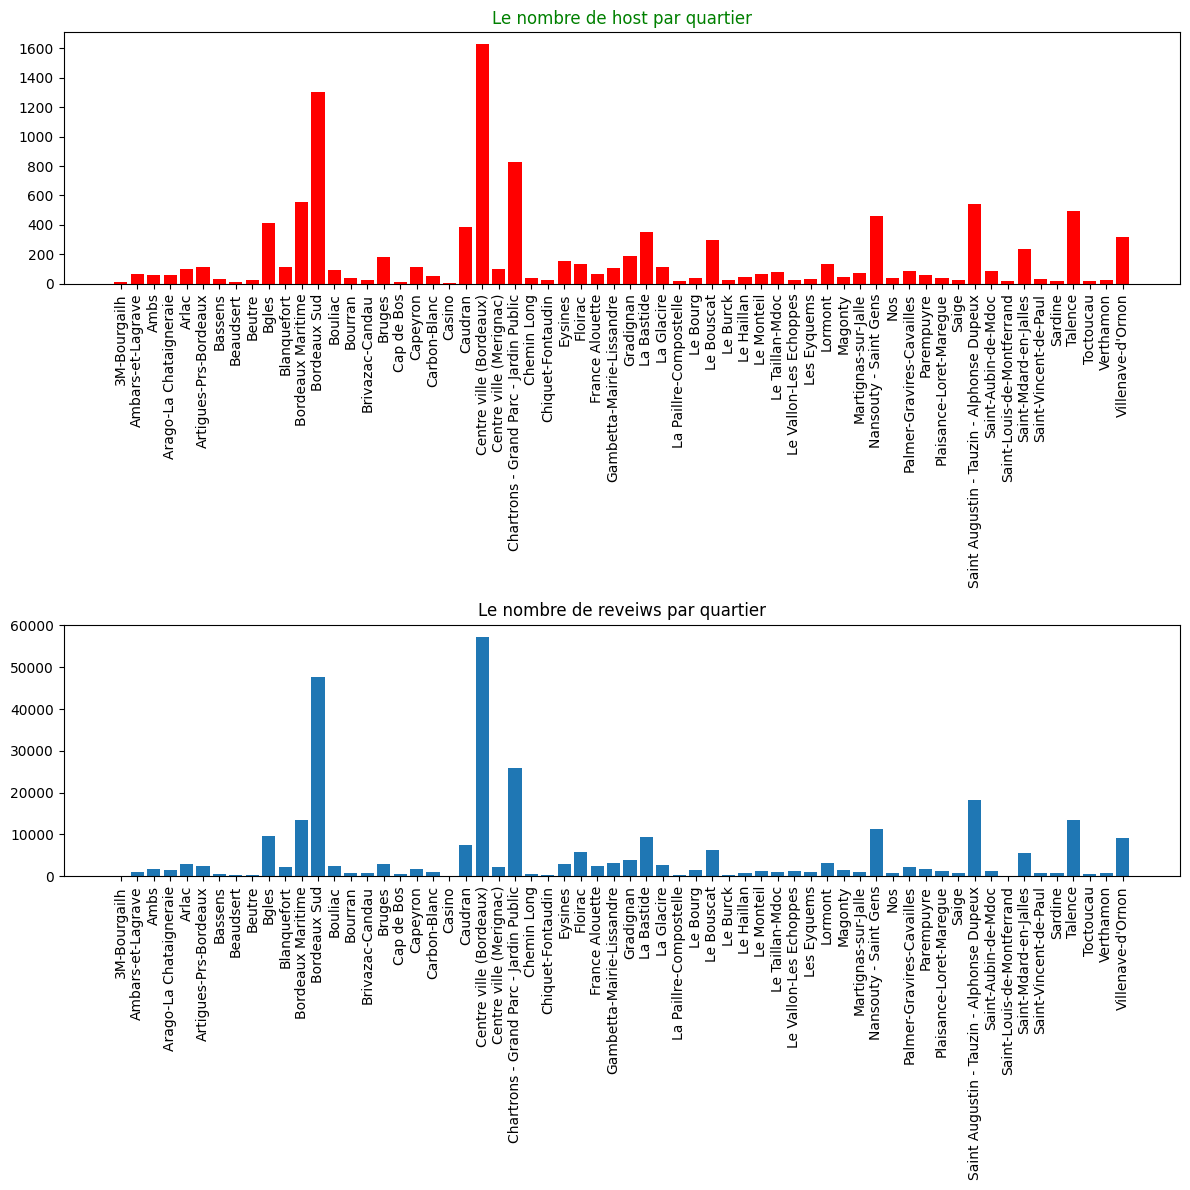

In [92]:
fig,axs=plt.subplots(2,1)
# plt.gcf().subplots_adjust( hspace = 1)
plt.gcf().set_size_inches(12, 12)
axs[0].bar(x=df_bordeaux_neighbourhood.index,height=df_bordeaux_neighbourhood.iloc[:,0],color='r')
#plt.gcf().xaxis.set_ticklabels(rotation=90,color='r')
axs[0].tick_params(axis='x',labelrotation=90)
axs[0].set_title("Le nombre de host par quartier",color='g')
axs[1].bar(x=df_bordeaux_neighbourhood.index,height=df_bordeaux_neighbourhood.iloc[:,1])
axs[1].tick_params(axis='x',rotation=90)
axs[1].set_title("Le nombre de reveiws par quartier")
fig.tight_layout()

In [ ]:
fig,axs=plt.subplots(2,1)
# plt.gcf().subplots_adjust( hspace = 1)
plt.gcf().set_size_inches(12, 12)
axs[0].bar(x=df_bordeaux_neighbourhood.index,height=df_bordeaux_neighbourhood.iloc[:,0],color='r')
#plt.gcf().xaxis.set_ticklabels(rotation=90,color='r')
axs[0].tick_params(axis='x',labelrotation=90)
axs[0].set_title("Le nombre de host par quartier",color='g')
axs[1].bar(x=df_bordeaux_neighbourhood.index,height=df_bordeaux_neighbourhood.iloc[:,1])
axs[1].tick_params(axis='x',rotation=90)
axs[1].set_title("Le nombre de reveiws par quartier")
fig.tight_layout()

In [10]:
df_ansers=df_bordeaux[["host_acceptance_rate","host_response_rate"]].dropna()
for col in df_ansers : 
    df_ansers[col]=df_ansers[col].str.replace('%',' ')


In [77]:
df_ansers=df_bordeaux[["host_acceptance_rate","host_response_rate"]].dropna()
for col in df_ansers.columns : 
    df_ansers[col]=df_ansers[col].str.replace('%','')
    df_ansers[col]=df_ansers[col].astype('int')
df_ansers.mean()

host_acceptance_rate    83.217050
host_response_rate      94.098051
dtype: float64

In [25]:
df_verefication=df_bordeaux[['host_verifications',"host_id"]]
#df_verefication.reset_index(inplace=True)
def porcentage_ver(df):
    totale_verification=df.shape[0]
    number_phone=df[df['host_verifications'].str.contains('phone')]['host_verifications'].count()
    porcent_phone=(number_phone/totale_verification)*100
    number_email=df[df['host_verifications'].str.contains('email')]['host_verifications'].count()
    porcent_email=(number_email/totale_verification)*100
    number_email_work=df[df['host_verifications'].str.contains('work_email')]['host_verifications'].count()
    porcent_email_work=(number_email_work/totale_verification)*100
    print("le nombre des verifivation par email : ", porcent_email)
    print("le nombre des verifivation par telephone : ", porcent_phone  )
    print("le nombre des verifivation par email professionel : ", porcent_email_work)
    return 

In [28]:
df_bordeaux[['host_verifications',"host_id"]].groupby('host_verifications').count()

,host_id
host_verifications,
"['email', 'phone', 'work_email']",677
"['email', 'phone']",9287
"['email', 'work_email']",1
['email'],45
"['phone', 'work_email']",24
['phone'],820
[],31


In [27]:
porcentage_ver(df_verefication)

le nombre des verifivation par email :  92.18190169958659
le nombre des verifivation par telephone :  99.29260450160771
le nombre des verifivation par email professionel :  6.449242076251722


In [95]:

df_room=df_bordeaux[['room_type','amenities']]
for i in range(df_room.shape[0]):
    A=df_room['amenities'][i]
    A=len(A.split(',')df_room['amenities'][i])




SyntaxError: invalid syntax. Perhaps you forgot a comma? (902822329.py, line 4)

In [96]:
df_room=df_bordeaux[['room_type','amenities']]
for i in range(df_room.shape[0]):
    A=df_room['amenities'][i]
    A=len(A.split(',')df_room['amenities'][i])l=["hamza","elbrek"]
len(l)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3953661103.py, line 4)

In [97]:
df_room=df_bordeaux[['room_type','amenities']]
for i in range(df_room.shape[0]):
    A=df_room['amenities'][i]
    df_room['amenities'][i]=len(A.split(','))
df_room_mean=df_room.groupby('room_type').mean()
df_room_std=df_room.groupby('room_type').std()

/tmp/ipykernel_220415/2697224123.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_room['amenities'][i]=len(A.split(','))


In [117]:
df_rom=df_bordeaux[['room_type','amenities']]
df_rom["nb_amenities"] = df_rom["amenities"].apply(eval).apply(len)
df_rom_describe=df_rom.groupby('room_type').describe()
df_rom_describe

/tmp/ipykernel_220415/1458112336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rom["nb_amenities"] = df_rom["amenities"].apply(eval).apply(len)


nb_amenities                                                 \
                       count       mean        std   min    25%   50%   75%   
room_type                                                                     
Entire home/apt       8278.0  27.402875  13.877863   0.0  15.25  26.0  37.0   
Hotel room              45.0  25.600000  12.979704  10.0  18.00  24.0  29.0   
Private room          2494.0  21.282678  12.302344   0.0  12.00  18.0  30.0   
Shared room             68.0  15.411765   7.957415   1.0  10.00  13.5  22.5   

                       
                  max  
room_type              
Entire home/apt  76.0  
Hotel room       63.0  
Private room     71.0  
Shared room      31.0

In [20]:
df_room_std

,amenities
room_type,
Entire home/apt,14.178751
Hotel room,14.458858
Private room,12.438094
Shared room,7.957415


In [98]:
df_price=df_bordeaux[['room_type','price']]
df_price['price']=df_price['price'].str.replace('$','')
df_price['price']=df_price['price'].str.replace(',','')
df_price['price']=df_price['price'].astype(float)
df_price

/tmp/ipykernel_220415/828885460.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_price['price']=df_price['price'].str.replace('$','')
/tmp/ipykernel_220415/828885460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price['price']=df_price['price'].str.replace('$','')
/tmp/ipykernel_220415/828885460.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

,room_type,price
0,Entire home/apt,60.0
1,Entire home/apt,280.0
2,Entire home/apt,110.0
3,Entire home/apt,120.0
4,Entire home/apt,139.0
...,...,...
10880,Entire home/apt,230.0
10881,Entire home/apt,107.0
10882,Entire home/apt,59.0
10883,Entire home/apt,90.0


In [99]:
df_price_mean=df_price.groupby('room_type').mean()
df_price_mean

,price
room_type,
Entire home/apt,119.815449
Hotel room,146.311111
Private room,60.055734
Shared room,51.500000


In [38]:
df_price_max=df_price.groupby('room_type').max()
df_price_max

,price
room_type,
Entire home/apt,8890.0
Hotel room,391.0
Private room,1492.0
Shared room,275.0


In [40]:
df_price_min=df_price.groupby('room_type').min()
df_price_min

,price
room_type,
Entire home/apt,12.0
Hotel room,0.0
Private room,10.0
Shared room,9.0


In [112]:
df_price_describe=df_price.groupby('room_type').describe()
df_price_describe


price                                                       \
                  count        mean         std   min     25%    50%     75%   
room_type                                                                      
Entire home/apt  8278.0  119.815449  174.163674  12.0   60.00   84.0  130.00   
Hotel room         45.0  146.311111   85.464193   0.0  100.00  131.0  169.00   
Private room     2494.0   60.055734   75.827128  10.0   30.00   40.0   60.00   
Shared room        68.0   51.500000   47.769190   9.0   25.75   42.5   49.25   

                         
                    max  
room_type                
Entire home/apt  8890.0  
Hotel room        391.0  
Private room     1492.0  
Shared room       275.0

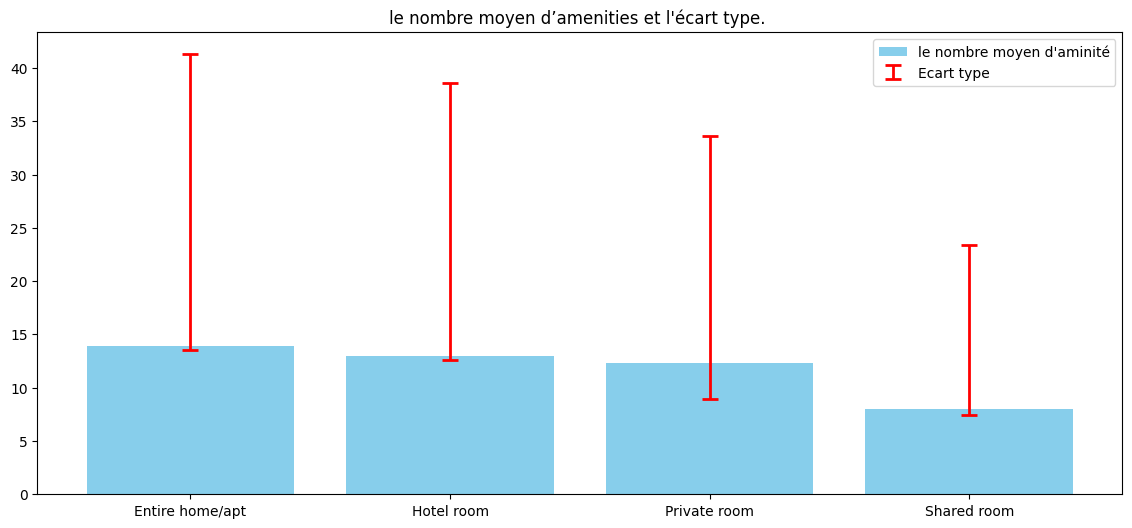

In [162]:
x=df_rom_describe.index.to_list()
y=df_rom_describe.iloc[:,1].to_list()
yerr=df_rom_describe.iloc[:,2].to_list()
plt.figure(figsize=(14,6))
plt.bar(x, yerr, color = 'skyblue',label='le nombre moyen d\'aminité')
plt.errorbar(x, y, yerr =yerr,fmt = 'none', capsize = 6, ecolor = 'red', elinewidth = 2, capthick = 2, ms=200, mew=2,label='Ecart type')
plt.title('le nombre moyen d’amenities et l\'écart type. ')
plt.legend()
plt.show()


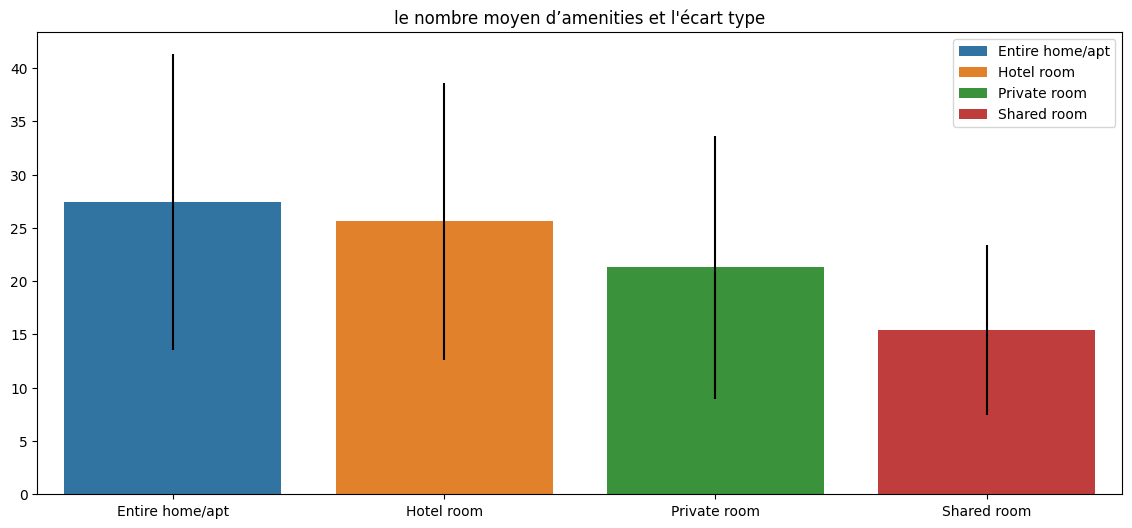

In [178]:

plt.figure(figsize=(14,6))
sns.barplot(x=df_rom_describe.index.to_list(),y=df_rom_describe.iloc[:,1].to_list(),yerr=df_rom_describe.iloc[:,2].to_list(),capsize=20,errwidth=4,label=df_rom_describe.index.to_list(),errcolor='red')
plt.title('le nombre moyen d’amenities et l\'écart type')
plt.legend()
plt.show()


In [58]:
df_correlation=df_bordeaux[['number_of_reviews','description']]
for i in range(df_correlation.shape[0]):
    if type(df_correlation['description'][i])!=float :
        A=len(df_correlation['description'][i])
        df_correlation['description'][i]=A
df_correlation['description']=df_correlation['description'].astype(float)

/tmp/ipykernel_43178/1997356056.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correlation['description'][i]=A
/tmp/ipykernel_43178/1997356056.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correlation['description']=df_correlation['description'].astype(float)


In [60]:
df_correlation.corr()


,number_of_reviews,description
number_of_reviews,1.000000,0.184217
description,0.184217,1.000000


In [7]:
df_reviews_bordeaux=pd.read_csv('reviews_bordeaux.csv')
df_reviews_bordeaux


,listing_id,date
0,218103,2011-11-11
1,218103,2012-04-12
2,218103,2012-04-12
3,218103,2012-04-14
4,218103,2012-05-02
...,...,...
306351,676160559071430643,2022-08-21
306352,676172890468973421,2022-08-09
306353,676172890468973421,2022-08-14
306354,676199336545361956,2022-08-14


In [8]:
df_reviews_bordeaux=df_reviews_bordeaux.rename(columns={"listing_id":"id"})

In [70]:
df_reviews_bordeaux


,id,date
0,218103,2011-11-11
1,218103,2012-04-12
2,218103,2012-04-12
3,218103,2012-04-14
4,218103,2012-05-02
...,...,...
306351,676160559071430643,2022-08-21
306352,676172890468973421,2022-08-09
306353,676172890468973421,2022-08-14
306354,676199336545361956,2022-08-14


In [62]:
df_neigh_bordeaux=pd.read_csv('neighbourhoods_bordeaux.csv')
df_neigh_bordeaux

,neighbourhood_group,neighbourhood
0,NaN,Borgo Panigale - Reno
1,NaN,Navile
2,NaN,Porto - Saragozza
3,NaN,San Donato - San Vitale
4,NaN,Santo Stefano
5,NaN,Savena


In [16]:
df_bordeaux.bathrooms.value_counts



<bound method IndexOpsMixin.value_counts of 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
10880   NaN
10881   NaN
10882   NaN
10883   NaN
10884   NaN
Name: bathrooms, Length: 10885, dtype: float64>

In [9]:
df_merge=pd.merge(df_bordeaux,df_reviews_bordeaux,how="inner",on="id")

In [72]:
df_merge

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,date
0,218103,https://www.airbnb.com/rooms/218103,20220912200234,2022-09-13,city scrape,B&B Apart.Suite / tropical garden,"<b>The space</b><br />The Bambooyard : ""Le cl...",NaN,https://a0.muscache.com/pictures/9ba23c8f-4780...,1127981,...,4.57,4.54,NaN,f,4,4,0,0,0.44,2011-11-11
1,218103,https://www.airbnb.com/rooms/218103,20220912200234,2022-09-13,city scrape,B&B Apart.Suite / tropical garden,"<b>The space</b><br />The Bambooyard : ""Le cl...",NaN,https://a0.muscache.com/pictures/9ba23c8f-4780...,1127981,...,4.57,4.54,NaN,f,4,4,0,0,0.44,2012-04-12
2,218103,https://www.airbnb.com/rooms/218103,20220912200234,2022-09-13,city scrape,B&B Apart.Suite / tropical garden,"<b>The space</b><br />The Bambooyard : ""Le cl...",NaN,https://a0.muscache.com/pictures/9ba23c8f-4780...,1127981,...,4.57,4.54,NaN,f,4,4,0,0,0.44,2012-04-12
3,218103,https://www.airbnb.com/rooms/218103,20220912200234,2022-09-13,city scrape,B&B Apart.Suite / tropical garden,"<b>The space</b><br />The Bambooyard : ""Le cl...",NaN,https://a0.muscache.com/pictures/9ba23c8f-4780...,1127981,...,4.57,4.54,NaN,f,4,4,0,0,0.44,2012-04-14
4,218103,https://www.airbnb.com/rooms/218103,20220912200234,2022-09-13,city scrape,B&B Apart.Suite / tropical garden,"<b>The space</b><br />The Bambooyard : ""Le cl...",NaN,https://a0.muscache.com/pictures/9ba23c8f-4780...,1127981,...,4.57,4.54,NaN,f,4,4,0,0,0.44,2012-05-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306351,676160559071430643,https://www.airbnb.com/rooms/676160559071430643,20220912200234,2022-09-12,city scrape,Appartement 2 chambres Bordeaux,Ce logement paisible offre un séjour détente p...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,38174909,...,4.00,3.00,33063008259FB,t,1,1,0,0,1.00,2022-08-21
306352,676172890468973421,https://www.airbnb.com/rooms/676172890468973421,20220912200234,2022-09-12,city scrape,Magnifique Hôtel avec Patio - Chambre proche Tram,"During your stay, your comfort is our priority...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,470784867,...,5.00,4.50,NaN,t,8,0,8,0,1.71,2022-08-09
306353,676172890468973421,https://www.airbnb.com/rooms/676172890468973421,20220912200234,2022-09-12,city scrape,Magnifique Hôtel avec Patio - Chambre proche Tram,"During your stay, your comfort is our priority...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,470784867,...,5.00,4.50,NaN,t,8,0,8,0,1.71,2022-08-14
306354,676199336545361956,https://www.airbnb.com/rooms/676199336545361956,20220912200234,2022-09-12,city scrape,Magnifique Hôtel avec Patio - Chambre proche Tram,"During your stay, your comfort is our priority...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,470784867,...,5.00,5.00,NaN,t,8,0,8,0,2.00,2022-08-14


In [80]:
df_faux_coment=df_bordeaux[['id','host_name']].groupby(['id','host_name']).count()

In [179]:
5//4

1